In [46]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Lighting Conditions Data
lightings = pd.read_csv('Raw_Data_Lighting_Condition.csv')

# Exposures Data
exposures = pd.read_csv('Raw_Data_Exposure.csv')

## Cleaning for lightings dataframe

In [47]:
# All outliers and missing values (0's) will be converted to NaN's
# Notice that missing values are replaced by NaN's first so that they don't affect the outlier detection
# The same thing will be done for the 'exposures' dataframe


# Replace 0's (missing values) with NaN
lightings.iloc[:, -60:] = lightings.iloc[:, -60:].replace(0, float('nan'))



# Replacing all the outliers with NaN's
# Define the columns you want to filter
selected_columns = lightings.columns[-60:]

# Calculate the IQR for each selected column
Q1 = lightings[selected_columns].quantile(0.25)
Q3 = lightings[selected_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace the outliers with 0
lightings[selected_columns] = np.where(
    (lightings[selected_columns] < lower_bound) | (lightings[selected_columns] > upper_bound),
    0,
    lightings[selected_columns]
)

# Replace the zeros with NA values
lightings[selected_columns] = lightings[selected_columns].replace(0, np.nan)

## Cleaning for exposures dataframe

In [48]:
# the code for this is basically going to be copy pasted from the lightings code, because the data is very similar


# Replace 0's with column mean
exposures.iloc[:, -50:] = exposures.iloc[:, -50:].replace(0, float('nan'))



# Replacing all the outliers with NaN's
# Define the columns you want to filter
# -50 because there are less exopsure options than lighting options, 5 as opposed to 6 per subject
selected_columns = exposures.columns[-50:]

# Calculate the IQR for each selected column
Q1 = exposures[selected_columns].quantile(0.25)
Q3 = exposures[selected_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace the outliers with 0
exposures[selected_columns] = np.where(
    (exposures[selected_columns] < lower_bound) | (exposures[selected_columns] > upper_bound),
    0,
    exposures[selected_columns]
)

# Replace the zeros with NA values
exposures[selected_columns] = exposures[selected_columns].replace(0, np.nan)

## NaN Count

In [49]:
print('This leaves us with', lightings[lightings.columns[-60:]].isna().sum().sum(), 'NaNs in the lightings dataframe, and', exposures[exposures.columns[-50:]].isna().sum().sum(), 'NaNs in the exposures dataframe.')
print (str(lightings[lightings.columns[-60:]].isna().sum().sum() / 12000 * 100) + '% of the lightings dataframe was converted to NaN during cleaning.')
print (str(exposures[exposures.columns[-50:]].isna().sum().sum() / 10000 * 100) + '% of the exposures dataframe was converted to NaN during cleaning.')

This leaves us with 386 NaNs in the lightings dataframe, and 168 NaNs in the exposures dataframe.
3.216666666666667% of the lightings dataframe was converted to NaN during cleaning.
1.68% of the exposures dataframe was converted to NaN during cleaning.


## Means and Standard Deviations for Each Lighting and Exposure type

#### Lightings

In [50]:
# Each lighting type's combined mean score and standard deviation among the ten subjects
# I initially also did minimum and maximum, but both were just 1 and 10 for everything
# same story for the percentiles, which were 4 and 7 respectively for everything as well

lighting_types = ["Overhead", "Ring light", "Box light", "Camera flash", "Two 45 degree box lights", "Natural light"]

for i in range(0, 6):
    lighting_columns = lightings.columns[range(17 + i, 77, 6)]
    mean_score = lightings[lighting_columns].mean().mean()
    std_score = lightings[lighting_columns].std().std()
    # min_score = lightings[lighting_columns].min().min()
    # max_score = lightings[lighting_columns].max().max()
    # percentile_25 = np.nanpercentile(lightings[lighting_columns], 25)
    # percentile_75 = np.nanpercentile(lightings[lighting_columns], 75)
    
    print(f"{lighting_types[i]}:")
    print(f"Mean Score: {mean_score:.2f}")
    print(f"Standard Deviation: {std_score:.2f}")
    # print(f"Minimum Score: {min_score:.2f}")
    # print(f"25th Percentile: {percentile_25:.2f}")
    # print(f"75th Percentile: {percentile_75:.2f}")
    # print(f"Maximum Score: {max_score:.2f}")
    print()

Overhead:
Mean Score: 5.27
Standard Deviation: 0.17

Ring light:
Mean Score: 5.51
Standard Deviation: 0.26

Box light:
Mean Score: 5.58
Standard Deviation: 0.18

Camera flash:
Mean Score: 5.47
Standard Deviation: 0.19

Two 45 degree box lights:
Mean Score: 5.47
Standard Deviation: 0.21

Natural light:
Mean Score: 5.43
Standard Deviation: 0.26



#### Exposures

In [51]:
# Each exposure level's combined mean score and standard deviation among the ten subjects
# same thing for the min, max and percentiles

exposure_types = ["fstop 8", "fstop 9", "fstop 11", "fstop 13", "fstop 16"]

for i in range(0, 5):
    exposure_columns = exposures.columns[range(13 + i, 63, 5)]
    mean_score = exposures[exposure_columns].mean().mean()
    std_score = exposures[exposure_columns].std().std()
    # min_score = exposures[exposure_columns].min().min()
    # max_score = exposures[exposure_columns].max().max()
    # percentile_25 = np.nanpercentile(exposures[exposure_columns], 25)
    # percentile_75 = np.nanpercentile(exposures[exposure_columns], 75)
    
    print(f"{exposure_types[i]}:")
    print(f"Mean Score: {mean_score:.2f}")
    print(f"Standard Deviation: {std_score:.2f}")
    # print(f"Minimum Score: {min_score:.2f}")
    # print(f"25th Percentile: {percentile_25:.2f}")
    # print(f"75th Percentile: {percentile_75:.2f}")
    # print(f"Maximum Score: {max_score:.2f}")
    print()

fstop 8:
Mean Score: 5.60
Standard Deviation: 0.12

fstop 9:
Mean Score: 5.64
Standard Deviation: 0.12

fstop 11:
Mean Score: 5.63
Standard Deviation: 0.15

fstop 13:
Mean Score: 5.61
Standard Deviation: 0.13

fstop 16:
Mean Score: 5.55
Standard Deviation: 0.25



## ANOVA Tests for significance of difference between category means

#### Lightings

In [52]:
# Test to check if all the groups having different means is statistically significant or not
# Remove NaN values from groups

sample_lighting_groups = {
    'overhead': lightings[lightings.columns[range(17, 77, 6)]].values.flatten(),
    'ringlight': lightings[lightings.columns[range(17 + 1, 77, 6)]].values.flatten(),
    'boxlight': lightings[lightings.columns[range(17 + 2, 77, 6)]].values.flatten(),
    'cameraflash': lightings[lightings.columns[range(17 + 3, 77, 6)]].values.flatten(),
    'two45degreeboxlights': lightings[lightings.columns[range(17 + 4, 77, 6)]].values.flatten(),
    'naturallight': lightings[lightings.columns[range(17 + 5, 77, 6)]].values.flatten()
}

groups = {key: value[~np.isnan(value)] for key, value in sample_lighting_groups.items()}

f_statistic, p_value = stats.f_oneway(*groups.values())

# Print the results
print("F-Statistic:", f_statistic)
print("p-value:", p_value)
print('The differences are statistically significant.')

F-Statistic: 5.163811674240732
p-value: 9.784267687002924e-05
The differences are statistically significant.


#### Exposures

In [53]:
# Test to check if all the groups having different means is statistically significant or not
# Remove NaN values from groups

sample_exposure_groups = {
    'fstop8': exposures[exposures.columns[range(13, 63, 5)]].values.flatten(),
    'fstop9': exposures[exposures.columns[range(13 + 1, 63, 5)]].values.flatten(),
    'fstop11': exposures[exposures.columns[range(13 + 2, 63, 5)]].values.flatten(),
    'fstop13': exposures[exposures.columns[range(13 + 3, 63, 5)]].values.flatten(),
    'fstop16': exposures[exposures.columns[range(13 + 4, 63, 5)]].values.flatten(),
}

groups = {key: value[~np.isnan(value)] for key, value in sample_exposure_groups.items()}

f_statistic, p_value = stats.f_oneway(*groups.values())

# Print the results
print("F-Statistic:", f_statistic)
print("p-value:", p_value)
print('The differences are NOT statistically significant.')

F-Statistic: 0.912376493299239
p-value: 0.4555575811687217
The differences are NOT statistically significant.


## Tables for significance between individual categories of the studies

#### Lightings

Darker indicates more significant p-values. Any 0.00s are just so small they dont fit


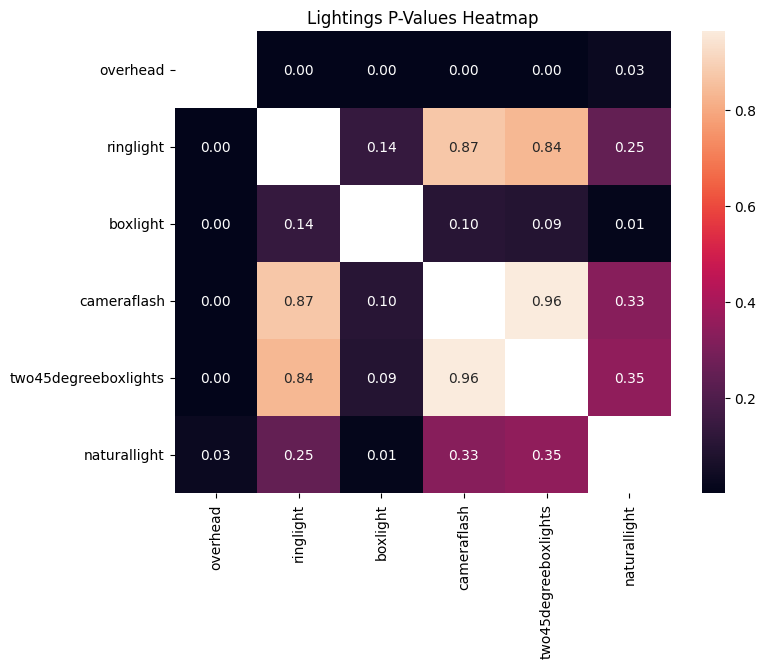

In [54]:
# Create an empty DataFrame to store the p-values
p_values_table = pd.DataFrame(index = sample_lighting_groups.keys(), columns = sample_lighting_groups.keys())

# Perform t-tests between sample groups
for group1_name, group1_values in sample_lighting_groups.items():
    for group2_name, group2_values in sample_lighting_groups.items():
        # Exclude self-comparisons
        if group1_name != group2_name:
            # drop nulls
            group1_values = group1_values[~pd.isnull(group1_values)]
            group2_values = group2_values[~pd.isnull(group2_values)]

            t_statistic, p_value = stats.ttest_ind(group1_values, group2_values, alternative='two-sided')
            p_values_table.loc[group1_name, group2_name] = p_value

light_p_values_df = pd.DataFrame(p_values_table.values, index=p_values_table.index, columns=p_values_table.columns)

# Print the p-values dataframe
print('Darker indicates more significant p-values. Any 0.00s are just so small they dont fit')

# Graphing
# Create a custom color map
# red shades for lower values
cmap = sns.cm.rocket  

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(light_p_values_df.astype(float), cmap=cmap, annot=True, fmt=".2f", cbar=True)
plt.title("Lightings P-Values Heatmap")
plt.show()

#### Exposures

Darker indicates more significant p-values.


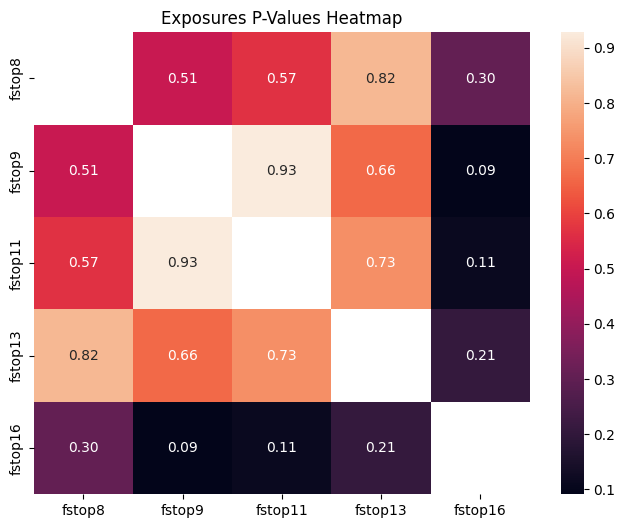

In [55]:
# Create an empty DataFrame to store the p-values
p_values_table = pd.DataFrame(index = sample_exposure_groups.keys(), columns = sample_exposure_groups.keys())

# Perform t-tests between sample groups
for group1_name, group1_values in sample_exposure_groups.items():
    for group2_name, group2_values in sample_exposure_groups.items():
        # Exclude self-comparisons
        if group1_name != group2_name:
            # drop nulls
            group1_values = group1_values[~pd.isnull(group1_values)]
            group2_values = group2_values[~pd.isnull(group2_values)]

            t_statistic, p_value = stats.ttest_ind(group1_values, group2_values, alternative='two-sided')
            p_values_table.loc[group1_name, group2_name] = p_value

exposure_p_values_df = pd.DataFrame(p_values_table.values, index=p_values_table.index, columns=p_values_table.columns)

# Print the p-values dataframe
print('Darker indicates more significant p-values.')

# Graphing
# Create a custom color map
# red shades for lower values
cmap = sns.cm.rocket  

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(exposure_p_values_df.astype(float), cmap=cmap, annot=True, fmt=".2f", cbar=True)
plt.title("Exposures P-Values Heatmap")
plt.show()

## Remarks

Basically, the conclusion was that the lightings had a significant impact on percieved attractiveness, with overhead lighting being the worst, and a box light (NOT the double box light) being the best. Exposures had no significant impact on percieved attractiveness. The p-value heatmaps were meant as a supplement to show which lightings differed from the others the most. Notably, for the exposures p-value heatmap, not a single section contains a p-value less than or equal to .05, meaning that not only do the exposures categories as a whole not have significant differences from each other, but even if you cherry-pick the highest and lowest categories, they still are not statistically significant.

Below I will include some other rudimentary supplementary graphics, just for a rough visualization. I made these histograms before doing the analysis in hopes that there would be a very obvious difference in score distribution among the different lightings/exposures.

Note that the graphs are only of subjects A and B for lightings, and only of subjects 1 and 2 for exposures. This is because it was just meant as a light eyeball test for significant changes in distribution between the category types.

#### Lightings

<Axes: xlabel='A1', ylabel='Percent'>

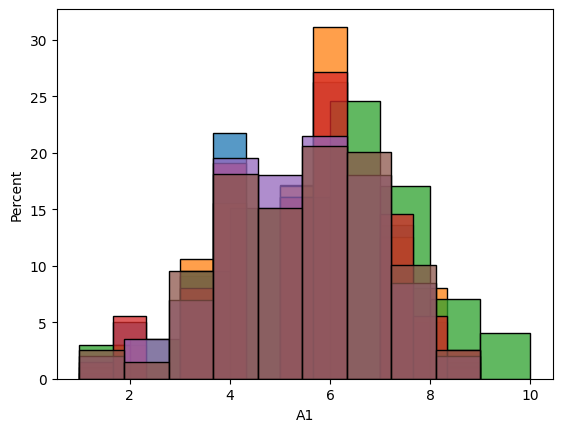

In [56]:
# trying to see if there is a very apparent gap among the same subject between the lighting types
sns.histplot(data = lightings, x = 'A1', stat = 'percent')
sns.histplot(data = lightings, x = 'A2', stat = 'percent')
sns.histplot(data = lightings, x = 'A3', stat = 'percent')
sns.histplot(data = lightings, x = 'A4', stat = 'percent')
sns.histplot(data = lightings, x = 'A5', stat = 'percent')
sns.histplot(data = lightings, x = 'A6', stat = 'percent')

<Axes: xlabel='B1', ylabel='Percent'>

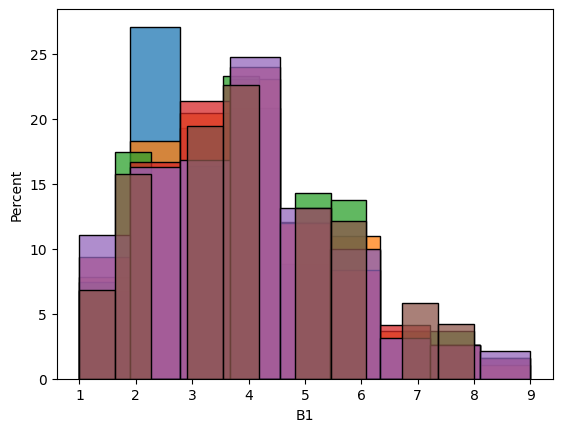

In [57]:
# same idea here
sns.histplot(data = lightings, x = 'B1', stat = 'percent')
sns.histplot(data = lightings, x = 'B2', stat = 'percent')
sns.histplot(data = lightings, x = 'B3', stat = 'percent')
sns.histplot(data = lightings, x = 'B4', stat = 'percent')
sns.histplot(data = lightings, x = 'B5', stat = 'percent')
sns.histplot(data = lightings, x = 'B6', stat = 'percent')

#### Exposures

<Axes: xlabel='11', ylabel='Percent'>

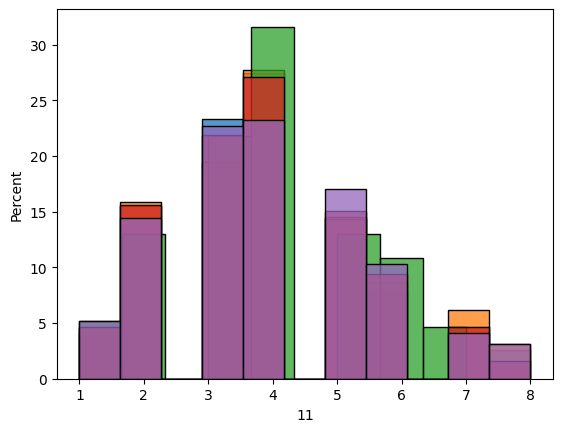

In [58]:
# trying the same thing i did with lightings, maybe this will work better
sns.histplot(data = exposures, x = '11', stat = 'percent')
sns.histplot(data = exposures, x = '12', stat = 'percent')
sns.histplot(data = exposures, x = '13', stat = 'percent')
sns.histplot(data = exposures, x = '14', stat = 'percent')
sns.histplot(data = exposures, x = '15', stat = 'percent')

<Axes: xlabel='21', ylabel='Percent'>

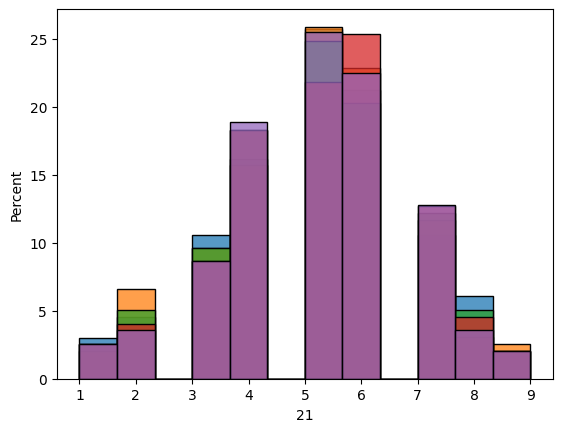

In [59]:
sns.histplot(data = exposures, x = '21', stat = 'percent')
sns.histplot(data = exposures, x = '22', stat = 'percent')
sns.histplot(data = exposures, x = '23', stat = 'percent')
sns.histplot(data = exposures, x = '24', stat = 'percent')
sns.histplot(data = exposures, x = '25', stat = 'percent')